 <img style="width:300px; heigth=300px;" src="tt.jpg">
 
 <h1 > <p style="color:blue; text-align:center;"> Projet : Fouille de Données </p></h1>

 <h2> <p style="color:blue; text-align:center;">Thème: Classification des Tweets</p></h2>
  <h3> <p style="color:blue; text-align:center;">Réalisé : Said Boukhrissa </p></h3>
  
  


<h2> <p style="color:red;">Objectifs : <img style="width:100px; heigth=100px;  " src="oo.jpg"> </p></h2> 

* Maitriser l’API de twitter pour l’extraction des tweets
1. Maitriser la partie NLP (natural language processing) avec NLTK en Python
2. Appliquer les principes de nettoyage des données
3. Classer les tweets : regrouper ensemble les tweets qui sont similaires. C’est une étape qui peut être considérée comme une étape 

<h2> <p style="color:red;">Les tâches à réaliser :</p></h2> 

<p style="font-weight:bold;">i. Prétraitement des tweets </p>

Dans cette étape, l’objectif est d’éliminer le texte inutile des tweets tels que les #, les noms des
utilisateurs, les url, …

<p style="font-weight:bold;">ii. Traitement des tweets : NLP (Natural LanguageProcessing) </p> </p>

On doit procéder à l’analyse du tweet en respectant les différentes étapes du NLP (Natural
LanguageProcessing). La bibliothèque à utiliser est NLTK en Python.

<p style="font-weight:bold;">iii. Classification des tweets </p>

Etant donné un ensemble de tweets, l’objectif est de les résumer sous formes de groupes de sorte à
ce que les Tweets qui sont dans le même groupe soient similaires. Ainsi, l’utilisateur pourra par la
suite lire juste un Tweet de chaque groupe (le Tweet qui est le centroïde de groupes).

In [26]:
!pip install tweepy
!pip install pandas

 <h3 style="color:red ;"> Les Imports ! </h3>

In [5]:
import pandas as pd 
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h3> DataSets!</h3>

<h4> La fonction "recuperer_tweets" à pour role de consommer l'API et sauvegrder les tweets dans "Datasettweets" </h4>


In [6]:
def recuperer_tweets(words, date_since, numtweet): 
      
    # Creating DataFrame using pandas 
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following', 
                               'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags']) 
      
    # We are using .Cursor() to search through twitter for the required tweets. 
    # The number of tweets can be restricted using .items(number of tweets) 
    tweets = tweepy.Cursor(api.search, q=words, lang="en", 
                           since=date_since, tweet_mode='extended').items(numtweet) 
     
    # .Cursor() returns an iterable object. Each item in  
    # the iterator has various attributes that you can access to  
    # get information about each tweet 
    list_tweets = [tweet for tweet in tweets] 
      
    # Counter to maintain Tweet Count 
    i = 1  
      
    # we will iterate over each tweet in the list for extracting information about each tweet 
    for tweet in list_tweets: 
        username = tweet.user.screen_name 
        description = tweet.user.description 
        location = tweet.user.location 
        following = tweet.user.friends_count 
        followers = tweet.user.followers_count 
        totaltweets = tweet.user.statuses_count 
        retweetcount = tweet.retweet_count 
        hashtags = tweet.entities['hashtags'] 
          
        # Retweets can be distinguished by a retweeted_status attribute, 
        # in case it is an invalid reference, except block will be executed 
        try: 
            text = tweet.retweeted_status.full_text 
        except AttributeError: 
            text = tweet.full_text 
        hashtext = list() 
        for j in range(0, len(hashtags)): 
            hashtext.append(hashtags[j]['text']) 
          
        # Here we are appending all the extracted information in the DataFrame 
        ith_tweet = [username, description, location, following, 
                     followers, totaltweets, retweetcount, text, hashtext] 
        db.loc[len(db)] = ith_tweet 
          
        # Function call to print tweet data on screen 
        printtweetdata(i, ith_tweet) 
        i = i+1
    filename = 'Datasettweets.csv'
      
    # we will save our database as a CSV file. 
    db.to_csv(filename) 
  
  
if __name__ == '__main__': 
      
    # Enter your own credentials obtained  
    # from your developer account 
    consumer_key = "ry9GMoJRUCdsHo89bkpVosu8T"
    consumer_secret = "y9Yy5X6RE3n6hEogGhVYCmGDKgDPhWuQB8sexc61xKH01Xv6MA"
    access_key = "1330861473481052162-NXO8xkGNxf0g6A7wbOjOfMPKZrfUvT"
    access_secret = "20Ye373RjvjjMfpbPHAW6kbwJURRbqRaQsnMYFBCrZpyw"
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    auth.set_access_token(access_key, access_secret) 
    api = tweepy.API(auth,wait_on_rate_limit=True) 
      
    # Enter Hashtag and initial date 
    print("Enter Twitter HashTag to search for") 
    words = input() 
    print("Enter Date since The Tweets are required in yyyy-mm--dd") 
    date_since = input() 
      
    # number of tweets you want to extract in one run 
    numtweet =2
    recuperer_tweets (words, date_since, numtweet) 
    print('charging tweets has completed!') 

Enter Twitter HashTag to search for
sport
Enter Date since The Tweets are required in yyyy-mm--dd
2333-22-2
charging tweets has completed!


<h4>Fonction pour affichier les tweets </h4>

In [2]:
# function to display data of each tweet 
def printtweetdata(n, ith_tweet): 
    print() 
    print(f"Tweet {n}:") 
    print(f"Username:{ith_tweet[0]}") 
    print(f"Description:{ith_tweet[1]}") 
    print(f"Location:{ith_tweet[2]}") 
    print(f"Following Count:{ith_tweet[3]}") 
    print(f"Follower Count:{ith_tweet[4]}") 
    print(f"Total Tweets:{ith_tweet[5]}") 
    print(f"Retweet Count:{ith_tweet[6]}") 
    print(f"Tweet Text:{ith_tweet[7]}") 
    print(f"Hashtags Used:{ith_tweet[8]}") 

<h4> Fussionner deux datasets ! </h4> 

In [33]:
df_1= pd.read_csv('Datasettweets1.csv')
df=pd.read_csv('Datasettweets.csv')
df_final=pd.concat([df, df_1], ignore_index=True)
print(df_final.shape)
df_final.head()

(4985, 10)


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,DatGladiatah,NaN,NaN,134,14,2226,0,@TulsiGabbard the biological essentialism of T...,[]
1,1,EliHayes_,ECU Alumnus 🏴‍☠️ | 910,"North Carolina, USA",84,76,4239,1,mighty funny how nobody in black sports media ...,[]
2,2,braincelltwo,Taking it well,Art by @sloppjockey,988,4496,54644,0,Tht time I was put in a gc full of barstool sp...,[]
3,3,WuanChill,#MCFC #FlyEaglesFly. This is a Anthony Martial...,NaN,279,137,17911,1,mighty funny how nobody in black sports media ...,[]
4,4,schweitz_ay,This guy gets it,NaN,425,57,1027,0,@DanSoder @katienolan that Andre AD read made ...,['sports']


In [4]:
print(df.shape)
print(df_1.shape)

(2985, 10)
(2000, 10)


<h3 style="color:red;"> Cleaning !</h3>

<h4> Supprimer les propriétes inutiles </h4>

In [5]:
to_drop = ['Unnamed: 0',
           'username',
           'description',
           'location',
           'following',
           'followers',
           'totaltweets']
#Eliminer les colonnes dans la liste de to_drop du dataframe df
df.drop(to_drop, inplace=True, axis=1)
#Afficherle résultat
df.head()

,retweetcount,text,hashtags
0,0,@TulsiGabbard the biological essentialism of T...,[]
1,1,mighty funny how nobody in black sports media ...,[]
2,0,Tht time I was put in a gc full of barstool sp...,[]
3,1,mighty funny how nobody in black sports media ...,[]
4,0,@DanSoder @katienolan that Andre AD read made ...,['sports']


<h4>Supprimer les ponctuations </h4>

In [14]:
import string , re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def remove_punct(text_t):
    text_t = "".join([char for char in text_t if char not in string.punctuation])
    text_t = re.sub('[0-9]+', '', text_t)
    
    
   
    
    
    return text_t

df['Tweet_punct'] = df['text'].apply(lambda x: remove_punct(x))
df.head(10)

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,Tweet_punct
0,0,DatGladiatah,NaN,NaN,134,14,2226,0,@TulsiGabbard the biological essentialism of T...,[],TulsiGabbard the biological essentialism of TE...
1,1,EliHayes_,ECU Alumnus 🏴‍☠️ | 910,"North Carolina, USA",84,76,4239,1,mighty funny how nobody in black sports media ...,[],mighty funny how nobody in black sports media ...
2,2,braincelltwo,Taking it well,Art by @sloppjockey,988,4496,54644,0,Tht time I was put in a gc full of barstool sp...,[],Tht time I was put in a gc full of barstool sp...
3,3,WuanChill,#MCFC #FlyEaglesFly. This is a Anthony Martial...,NaN,279,137,17911,1,mighty funny how nobody in black sports media ...,[],mighty funny how nobody in black sports media ...
4,4,schweitz_ay,This guy gets it,NaN,425,57,1027,0,@DanSoder @katienolan that Andre AD read made ...,['sports'],DanSoder katienolan that Andre AD read made me...
5,5,Gotown_Rebel,#abs-tribe-experience. Feeding my mental & spi...,Chicago,1380,246,2964,0,@oCHiCAx I agree. I believe in trans rights 2 ...,[],oCHiCAx I agree I believe in trans rights but...
6,6,christinaann23_,baseball!!,she/her • 15 • 🏳️‍🌈,955,488,5171,42,constantly making fun of the wnba and women's ...,[],constantly making fun of the wnba and womens s...
7,7,TheMomGamePod,Moms. Sports. And everything in between. If yo...,NaN,94,1778,313,1,"Funny how things come full circle, @EmilyJones...",[],Funny how things come full circle EmilyJonesMc...
8,8,PolarizeRW,16 • CoD Player for • DMs are open for any sp...,"Iowa, USA",2744,1425,27029,42,constantly making fun of the wnba and women's ...,[],constantly making fun of the wnba and womens s...
9,9,jedd_18,NaN,NaN,5001,454,18042,3,"Winter sports are funny, especially when you’r...",[],Winter sports are funny especially when you’re...


<h4> Supprimer les mots inutiles et faire tokenization </h4>

In [16]:

df['Tweet_SanS_L_Mot'] = df['Tweet_punct'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
def tokenization(text):
    text = re.split(' ', text)
    return text

df['Tweet_tokenized'] = df['Tweet_SanS_L_Mot'].apply(lambda x: tokenization(x.lower()))

df.head()


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,Tweet_punct,Tweet_SanS_L_Mot,Tweet_tokenized
0,0,DatGladiatah,NaN,NaN,134,14,2226,0,@TulsiGabbard the biological essentialism of T...,[],TulsiGabbard the biological essentialism of TE...,TulsiGabbard biological essentialism TERFs fun...,"[tulsigabbard, biological, essentialism, terfs..."
1,1,EliHayes_,ECU Alumnus 🏴‍☠️ | 910,"North Carolina, USA",84,76,4239,1,mighty funny how nobody in black sports media ...,[],mighty funny how nobody in black sports media ...,mighty funny nobody black sports media standin...,"[mighty, funny, nobody, black, sports, media, ..."
2,2,braincelltwo,Taking it well,Art by @sloppjockey,988,4496,54644,0,Tht time I was put in a gc full of barstool sp...,[],Tht time I was put in a gc full of barstool sp...,time full barstool sports type funny accounts ...,"[time, full, barstool, sports, type, funny, ac..."
3,3,WuanChill,#MCFC #FlyEaglesFly. This is a Anthony Martial...,NaN,279,137,17911,1,mighty funny how nobody in black sports media ...,[],mighty funny how nobody in black sports media ...,mighty funny nobody black sports media standin...,"[mighty, funny, nobody, black, sports, media, ..."
4,4,schweitz_ay,This guy gets it,NaN,425,57,1027,0,@DanSoder @katienolan that Andre AD read made ...,['sports'],DanSoder katienolan that Andre AD read made me...,DanSoder katienolan that Andre read made swerv...,"[dansoder, katienolan, that, andre, read, made..."


In [17]:
df.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,Tweet_punct,Tweet_SanS_L_Mot,Tweet_tokenized
0,0,DatGladiatah,NaN,NaN,134,14,2226,0,@TulsiGabbard the biological essentialism of T...,[],TulsiGabbard the biological essentialism of TE...,TulsiGabbard biological essentialism TERFs fun...,"[tulsigabbard, biological, essentialism, terfs..."
1,1,EliHayes_,ECU Alumnus 🏴‍☠️ | 910,"North Carolina, USA",84,76,4239,1,mighty funny how nobody in black sports media ...,[],mighty funny how nobody in black sports media ...,mighty funny nobody black sports media standin...,"[mighty, funny, nobody, black, sports, media, ..."
2,2,braincelltwo,Taking it well,Art by @sloppjockey,988,4496,54644,0,Tht time I was put in a gc full of barstool sp...,[],Tht time I was put in a gc full of barstool sp...,time full barstool sports type funny accounts ...,"[time, full, barstool, sports, type, funny, ac..."
3,3,WuanChill,#MCFC #FlyEaglesFly. This is a Anthony Martial...,NaN,279,137,17911,1,mighty funny how nobody in black sports media ...,[],mighty funny how nobody in black sports media ...,mighty funny nobody black sports media standin...,"[mighty, funny, nobody, black, sports, media, ..."
4,4,schweitz_ay,This guy gets it,NaN,425,57,1027,0,@DanSoder @katienolan that Andre AD read made ...,['sports'],DanSoder katienolan that Andre AD read made me...,DanSoder katienolan that Andre read made swerv...,"[dansoder, katienolan, that, andre, read, made..."


In [18]:
!pip install nltk

In [20]:

import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SAID\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [23]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstopW'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,Tweet_punct,Tweet_SanS_L_Mot,Tweet_tokenized,Tweet_nonstopW
0,0,DatGladiatah,NaN,NaN,134,14,2226,0,@TulsiGabbard the biological essentialism of T...,[],TulsiGabbard the biological essentialism of TE...,TulsiGabbard biological essentialism TERFs fun...,"[tulsigabbard, biological, essentialism, terfs...","[tulsigabbard, biological, essentialism, terfs..."
1,1,EliHayes_,ECU Alumnus 🏴‍☠️ | 910,"North Carolina, USA",84,76,4239,1,mighty funny how nobody in black sports media ...,[],mighty funny how nobody in black sports media ...,mighty funny nobody black sports media standin...,"[mighty, funny, nobody, black, sports, media, ...","[mighty, funny, nobody, black, sports, media, ..."
2,2,braincelltwo,Taking it well,Art by @sloppjockey,988,4496,54644,0,Tht time I was put in a gc full of barstool sp...,[],Tht time I was put in a gc full of barstool sp...,time full barstool sports type funny accounts ...,"[time, full, barstool, sports, type, funny, ac...","[time, full, barstool, sports, type, funny, ac..."
3,3,WuanChill,#MCFC #FlyEaglesFly. This is a Anthony Martial...,NaN,279,137,17911,1,mighty funny how nobody in black sports media ...,[],mighty funny how nobody in black sports media ...,mighty funny nobody black sports media standin...,"[mighty, funny, nobody, black, sports, media, ...","[mighty, funny, nobody, black, sports, media, ..."
4,4,schweitz_ay,This guy gets it,NaN,425,57,1027,0,@DanSoder @katienolan that Andre AD read made ...,['sports'],DanSoder katienolan that Andre AD read made me...,DanSoder katienolan that Andre read made swerv...,"[dansoder, katienolan, that, andre, read, made...","[dansoder, katienolan, andre, read, made, swer..."


<h4>Stem (racine) est la partie du mot à laquelle vous ajoutez des affixes flexionnels (changement / dérivation) tels que (-ed, -ize, -s, -de, mis). Ainsi, la racine d'un mot ou d'une phrase peut entraîner des mots qui ne sont pas des mots réels. Les souches sont créées en supprimant les suffixes ou préfixes utilisés avec un mot. </h4>

In [25]:
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstopW'].apply(lambda x: stemming(x))
df.head()

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,Tweet_punct,Tweet_SanS_L_Mot,Tweet_tokenized,Tweet_nonstopW,Tweet_stemmed
0,0,DatGladiatah,NaN,NaN,134,14,2226,0,@TulsiGabbard the biological essentialism of T...,[],TulsiGabbard the biological essentialism of TE...,TulsiGabbard biological essentialism TERFs fun...,"[tulsigabbard, biological, essentialism, terfs...","[tulsigabbard, biological, essentialism, terfs...","[tulsigabbard, biolog, essenti, terf, funni, a..."
1,1,EliHayes_,ECU Alumnus 🏴‍☠️ | 910,"North Carolina, USA",84,76,4239,1,mighty funny how nobody in black sports media ...,[],mighty funny how nobody in black sports media ...,mighty funny nobody black sports media standin...,"[mighty, funny, nobody, black, sports, media, ...","[mighty, funny, nobody, black, sports, media, ...","[mighti, funni, nobodi, black, sport, media, s..."
2,2,braincelltwo,Taking it well,Art by @sloppjockey,988,4496,54644,0,Tht time I was put in a gc full of barstool sp...,[],Tht time I was put in a gc full of barstool sp...,time full barstool sports type funny accounts ...,"[time, full, barstool, sports, type, funny, ac...","[time, full, barstool, sports, type, funny, ac...","[time, full, barstool, sport, type, funni, acc..."
3,3,WuanChill,#MCFC #FlyEaglesFly. This is a Anthony Martial...,NaN,279,137,17911,1,mighty funny how nobody in black sports media ...,[],mighty funny how nobody in black sports media ...,mighty funny nobody black sports media standin...,"[mighty, funny, nobody, black, sports, media, ...","[mighty, funny, nobody, black, sports, media, ...","[mighti, funni, nobodi, black, sport, media, s..."
4,4,schweitz_ay,This guy gets it,NaN,425,57,1027,0,@DanSoder @katienolan that Andre AD read made ...,['sports'],DanSoder katienolan that Andre AD read made me...,DanSoder katienolan that Andre read made swerv...,"[dansoder, katienolan, that, andre, read, made...","[dansoder, katienolan, andre, read, made, swer...","[dansod, katienolan, andr, read, made, swerv, ..."


<h4> La lemmatisation, contrairement au Stemming, réduit correctement les mots fléchis en s'assurant que le mot racine appartient à la langue. Dans la lemmatisation, le mot racine est appelé Lemme . Un lemme (lemme pluriel ou lemmata) est la forme canonique, la forme du dictionnaire ou la forme de citation d'un ensemble de mots.</h4>

In [26]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_stemmed'].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SAID\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,Tweet_punct,Tweet_SanS_L_Mot,Tweet_tokenized,Tweet_nonstopW,Tweet_stemmed,Tweet_lemmatized
0,0,DatGladiatah,NaN,NaN,134,14,2226,0,@TulsiGabbard the biological essentialism of T...,[],TulsiGabbard the biological essentialism of TE...,TulsiGabbard biological essentialism TERFs fun...,"[tulsigabbard, biological, essentialism, terfs...","[tulsigabbard, biological, essentialism, terfs...","[tulsigabbard, biolog, essenti, terf, funni, a...","[tulsigabbard, biolog, essenti, terf, funni, a..."
1,1,EliHayes_,ECU Alumnus 🏴‍☠️ | 910,"North Carolina, USA",84,76,4239,1,mighty funny how nobody in black sports media ...,[],mighty funny how nobody in black sports media ...,mighty funny nobody black sports media standin...,"[mighty, funny, nobody, black, sports, media, ...","[mighty, funny, nobody, black, sports, media, ...","[mighti, funni, nobodi, black, sport, media, s...","[mighti, funni, nobodi, black, sport, medium, ..."
2,2,braincelltwo,Taking it well,Art by @sloppjockey,988,4496,54644,0,Tht time I was put in a gc full of barstool sp...,[],Tht time I was put in a gc full of barstool sp...,time full barstool sports type funny accounts ...,"[time, full, barstool, sports, type, funny, ac...","[time, full, barstool, sports, type, funny, ac...","[time, full, barstool, sport, type, funni, acc...","[time, full, barstool, sport, type, funni, acc..."
3,3,WuanChill,#MCFC #FlyEaglesFly. This is a Anthony Martial...,NaN,279,137,17911,1,mighty funny how nobody in black sports media ...,[],mighty funny how nobody in black sports media ...,mighty funny nobody black sports media standin...,"[mighty, funny, nobody, black, sports, media, ...","[mighty, funny, nobody, black, sports, media, ...","[mighti, funni, nobodi, black, sport, media, s...","[mighti, funni, nobodi, black, sport, medium, ..."
4,4,schweitz_ay,This guy gets it,NaN,425,57,1027,0,@DanSoder @katienolan that Andre AD read made ...,['sports'],DanSoder katienolan that Andre AD read made me...,DanSoder katienolan that Andre read made swerv...,"[dansoder, katienolan, that, andre, read, made...","[dansoder, katienolan, andre, read, made, swer...","[dansod, katienolan, andr, read, made, swerv, ...","[dansod, katienolan, andr, read, made, swerv, ..."


<h4>Sauvegarder les cleaned tweets !</h4>

In [27]:
df.Tweet_lemmatized.to_csv('Tweets_cleaned.csv',index = False)

In [28]:
new_tweet_df= pd.read_csv('Tweets_cleaned.csv')
new_tweet_df.head(10)


,Tweet_lemmatized
0,"['tulsigabbard', 'biolog', 'essenti', 'terf', ..."
1,"['mighti', 'funni', 'nobodi', 'black', 'sport'..."
2,"['time', 'full', 'barstool', 'sport', 'type', ..."
3,"['mighti', 'funni', 'nobodi', 'black', 'sport'..."
4,"['dansod', 'katienolan', 'andr', 'read', 'made..."
5,"['ochicax', 'agre', 'believ', 'tran', 'right',..."
6,"['constantli', 'make', 'wnba', 'woman', 'sport..."
7,"['funni', 'thing', 'come', 'full', 'circl', 'e..."
8,"['constantli', 'make', 'wnba', 'woman', 'sport..."
9,"['winter', 'sport', 'funni', 'especi', 'you’r'..."


In [29]:
print('Dataset size:',new_tweet_df.shape)
print('Columns are:',new_tweet_df.columns)

Dataset size: (2985, 1)
Columns are: Index(['Tweet_lemmatized'], dtype='object')


<h4> Vectorisation des tweets  </h4>

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X=cv.fit_transform(new_tweet_df.Tweet_lemmatized)
print(X)

  (0, 8000)	1
  (0, 686)	2
  (0, 2257)	1
  (0, 7657)	1
  (0, 2659)	1
  (0, 325)	1
  (0, 8236)	1
  (0, 2226)	1
  (0, 4288)	1
  (0, 5366)	1
  (0, 7816)	1
  (0, 8556)	2
  (0, 4261)	1
  (0, 8052)	1
  (0, 1369)	1
  (0, 5171)	1
  (0, 2860)	1
  (0, 7271)	1
  (1, 2659)	1
  (1, 7271)	1
  (1, 5279)	1
  (1, 5596)	1
  (1, 708)	1
  (1, 5208)	1
  (1, 7356)	1
  :	:
  (2983, 7862)	1
  (2983, 8285)	1
  (2983, 2782)	1
  (2983, 7202)	1
  (2983, 7346)	1
  (2983, 7393)	1
  (2983, 790)	1
  (2983, 4013)	1
  (2983, 3439)	1
  (2984, 2659)	1
  (2984, 7271)	1
  (2984, 7846)	1
  (2984, 6300)	1
  (2984, 7459)	1
  (2984, 2504)	1
  (2984, 4117)	1
  (2984, 7862)	1
  (2984, 8285)	1
  (2984, 2782)	1
  (2984, 7202)	1
  (2984, 7346)	1
  (2984, 7393)	1
  (2984, 790)	1
  (2984, 4013)	1
  (2984, 3439)	1


<h3 style="color:red;"> Clustering ! </h3>

<h4> J'ai utilisé l’algorithme K-Means pour  classer  les Tweets  en k classes </h4>

In [30]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(3,30):
    print(" ********** Nombre de cluster : ************",i)
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

 ********** Nombre de cluster : ************ 3
Initialization complete
Iteration 0, inertia 54531.0
Iteration 1, inertia 46161.59494883455
Iteration 2, inertia 46148.470641200394
Iteration 3, inertia 46148.292993631505
Converged at iteration 3: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 68153.0
Iteration 1, inertia 47177.64806462464
Converged at iteration 1: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 61766.0
Iteration 1, inertia 46856.78114478123
Converged at iteration 1: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 71919.0
Iteration 1, inertia 46596.83663100329
Iteration 2, inertia 46114.20791235831
Iteration 3, inertia 45331.152188851534
Iteration 4, inertia 45142.80993150657
Converged at iteration 4: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 60954.0
Iterat

Iteration 6, inertia 44459.91302169132
Iteration 7, inertia 44330.73136559396
Iteration 8, inertia 43894.226744967425
Iteration 9, inertia 43673.29066153236
Iteration 10, inertia 43233.90466498539
Iteration 11, inertia 42585.49317700354
Iteration 12, inertia 41849.39140509841
Iteration 13, inertia 41847.81600095545
Iteration 14, inertia 41847.64133820439
Iteration 15, inertia 41847.57974480985
Converged at iteration 15: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 60735.0
Iteration 1, inertia 46276.19857834573
Iteration 2, inertia 46275.48629978403
Converged at iteration 2: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 57228.0
Iteration 1, inertia 43519.521707542466
Converged at iteration 1: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 63713.0
Iteration 1, inertia 41910.73656932373
Iteration 2, inertia 40634.0265855192
It

Iteration 10, inertia 42986.64467737872
Iteration 11, inertia 42908.834380003536
Iteration 12, inertia 42891.09488635877
Converged at iteration 12: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 66154.0
Iteration 1, inertia 44234.946529081346
Iteration 2, inertia 43848.68389495701
Iteration 3, inertia 43570.53716621289
Iteration 4, inertia 43469.189364436934
Iteration 5, inertia 43402.96430722533
Iteration 6, inertia 43250.46650490208
Iteration 7, inertia 42772.53403649107
Iteration 8, inertia 42627.419812834596
Iteration 9, inertia 42112.50713985962
Iteration 10, inertia 41552.63964033102
Iteration 11, inertia 40816.97179328375
Iteration 12, inertia 40816.01852621554
Iteration 13, inertia 40815.653095845206
Iteration 14, inertia 40815.47956716184
Iteration 15, inertia 40815.328869552905
Converged at iteration 15: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 56375.0
Iteration 1

Iteration 0, inertia 60226.0
Iteration 1, inertia 40232.89286207088
Iteration 2, inertia 39805.46550186022
Iteration 3, inertia 39577.27619488938
Iteration 4, inertia 39453.35976982739
Iteration 5, inertia 39367.63433365993
Iteration 6, inertia 39059.7987366309
Iteration 7, inertia 39041.692693468445
Converged at iteration 7: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 49948.0
Iteration 1, inertia 36777.38766013278
Iteration 2, inertia 36776.36720640991
Iteration 3, inertia 36776.17392317431
Iteration 4, inertia 36775.676349687914
Iteration 5, inertia 36775.27113527393
Iteration 6, inertia 36775.157636468146
Iteration 7, inertia 36775.02018331814
Converged at iteration 7: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 50171.0
Iteration 1, inertia 38079.69803519719
Iteration 2, inertia 37919.02413301491
Iteration 3, inertia 37841.683075082874
Iteration 4, inertia 37830.63490350

Initialization complete
Iteration 0, inertia 49531.0
Iteration 1, inertia 37873.915334884885
Iteration 2, inertia 37788.77150921982
Iteration 3, inertia 37779.580804497185
Iteration 4, inertia 37779.39889409346
Converged at iteration 4: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 52432.0
Iteration 1, inertia 40055.468945051245
Iteration 2, inertia 39725.35861346604
Iteration 3, inertia 39685.82271595553
Iteration 4, inertia 39683.11726178347
Iteration 5, inertia 39677.575845511885
Iteration 6, inertia 39674.62437804628
Iteration 7, inertia 39670.22032865695
Iteration 8, inertia 39666.503061652504
Converged at iteration 8: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 56773.0
Iteration 1, inertia 37997.95566742641
Iteration 2, inertia 37916.81204152466
Iteration 3, inertia 37887.63638530691
Iteration 4, inertia 37787.84426780904
Iteration 5, inertia 37718.56607571005
Iteration

Iteration 0, inertia 44266.0
Iteration 1, inertia 35131.05231951056
Iteration 2, inertia 35117.68585810025
Iteration 3, inertia 35117.134571263356
Converged at iteration 3: center shift 0.0 within tolerance 1.844509316165746e-07
 ********** Nombre de cluster : ************ 13
Initialization complete
Iteration 0, inertia 43681.0
Iteration 1, inertia 36810.21593733266
Iteration 2, inertia 36791.31623710557
Iteration 3, inertia 36791.135853524
Converged at iteration 3: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 49439.0
Iteration 1, inertia 37797.56554564576
Iteration 2, inertia 37712.40469833581
Iteration 3, inertia 37703.213165856956
Iteration 4, inertia 37703.03123452706
Converged at iteration 4: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 51877.0
Iteration 1, inertia 39573.503016313916
Iteration 2, inertia 39243.37832297383
Iteration 3, inertia 39203.83714135841
Iteration 

Iteration 0, inertia 43957.0
Iteration 1, inertia 34859.742201413705
Iteration 2, inertia 34846.35825862841
Iteration 3, inertia 34845.806599987794
Converged at iteration 3: center shift 0.0 within tolerance 1.844509316165746e-07
 ********** Nombre de cluster : ************ 15
Initialization complete
Iteration 0, inertia 42063.0
Iteration 1, inertia 35364.13982618644
Iteration 2, inertia 35345.19798419005
Iteration 3, inertia 35345.01727683237
Converged at iteration 3: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 44237.0
Iteration 1, inertia 33983.17286978274
Iteration 2, inertia 33895.140716651316
Iteration 3, inertia 33885.60332713076
Iteration 4, inertia 33885.11865172014
Converged at iteration 4: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 47635.0
Iteration 1, inertia 36623.038144253245
Iteration 2, inertia 36389.75701425127
Iteration 3, inertia 36311.3441134243
Iteratio

Iteration 0, inertia 42757.0
Iteration 1, inertia 33865.03343563201
Iteration 2, inertia 33851.36376430735
Iteration 3, inertia 33850.985716099196
Converged at iteration 3: center shift 0.0 within tolerance 1.844509316165746e-07
 ********** Nombre de cluster : ************ 17
Initialization complete
Iteration 0, inertia 41088.0
Iteration 1, inertia 34359.8784533437
Iteration 2, inertia 34340.91527953934
Iteration 3, inertia 34340.73443529849
Converged at iteration 3: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 44018.0
Iteration 1, inertia 33661.414740167
Iteration 2, inertia 33512.49793199038
Iteration 3, inertia 33480.11805972452
Iteration 4, inertia 33469.2279232203
Converged at iteration 4: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 44924.0
Iteration 1, inertia 34215.28033461202
Iteration 2, inertia 33980.389696789556
Iteration 3, inertia 33898.42482868591
Iteration 4, 

Initialization complete
Iteration 0, inertia 40854.0
Iteration 1, inertia 34182.07800447665
Iteration 2, inertia 34163.095128237364
Iteration 3, inertia 34162.914175556216
Converged at iteration 3: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 43634.0
Iteration 1, inertia 33340.83092237867
Iteration 2, inertia 33191.75586402384
Iteration 3, inertia 33159.477761247326
Iteration 4, inertia 33148.587353850955
Converged at iteration 4: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 44854.0
Iteration 1, inertia 34155.62935212041
Iteration 2, inertia 33920.73845524336
Iteration 3, inertia 33838.76256954904
Iteration 4, inertia 33729.31771016508
Iteration 5, inertia 33720.458954506044
Iteration 6, inertia 33719.35431091575
Iteration 7, inertia 33716.63338947179
Converged at iteration 7: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia

Iteration 2, inertia 33274.95760703466
Iteration 3, inertia 33274.57757690563
Converged at iteration 3: center shift 0.0 within tolerance 1.844509316165746e-07
 ********** Nombre de cluster : ************ 21
Initialization complete
Iteration 0, inertia 39373.0
Iteration 1, inertia 34042.1546325267
Iteration 2, inertia 34034.69072389106
Iteration 3, inertia 34033.47305468493
Converged at iteration 3: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 37627.0
Iteration 1, inertia 32389.744858644168
Iteration 2, inertia 32380.04095558023
Iteration 3, inertia 32379.729778407727
Converged at iteration 3: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 37110.0
Iteration 1, inertia 33923.521481589036
Iteration 2, inertia 33923.043565887485
Converged at iteration 2: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 45450.0
Iteration 1, inerti

Initialization complete
Iteration 0, inertia 38734.0
Iteration 1, inertia 33396.63086942751
Iteration 2, inertia 33387.18960863248
Iteration 3, inertia 33385.407580563726
Iteration 4, inertia 33382.942145151785
Iteration 5, inertia 33378.975149953825
Iteration 6, inertia 33371.68205086717
Iteration 7, inertia 33367.33168554116
Iteration 8, inertia 33365.969296353636
Iteration 9, inertia 33364.454517825805
Converged at iteration 9: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 38590.0
Iteration 1, inertia 31836.23938457394
Iteration 2, inertia 31747.540719398155
Iteration 3, inertia 31669.75060698157
Iteration 4, inertia 31666.63738627953
Converged at iteration 4: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 37210.0
Iteration 1, inertia 31849.273943853335
Iteration 2, inertia 31769.19780221407
Iteration 3, inertia 31766.763069937548
Converged at iteration 3: center shift 0.0 wi

Initialization complete
Iteration 0, inertia 41662.0
Iteration 1, inertia 31590.151779299806
Iteration 2, inertia 31477.13666325719
Iteration 3, inertia 31440.246431792293
Iteration 4, inertia 31384.480580704738
Iteration 5, inertia 31316.915492281863
Iteration 6, inertia 31280.24380570973
Iteration 7, inertia 31242.606431587017
Iteration 8, inertia 31237.321378537097
Iteration 9, inertia 31232.96822856826
Iteration 10, inertia 31231.228794926297
Iteration 11, inertia 31231.117494149694
Converged at iteration 11: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 37065.0
Iteration 1, inertia 31629.977535331353
Iteration 2, inertia 31592.778480719808
Iteration 3, inertia 31567.5517753249
Iteration 4, inertia 31559.39604394059
Converged at iteration 4: center shift 0.0 within tolerance 1.844509316165746e-07
Initialization complete
Iteration 0, inertia 37944.0
Iteration 1, inertia 31189.202929980882
Iteration 2, inertia 31099.4962409886
It

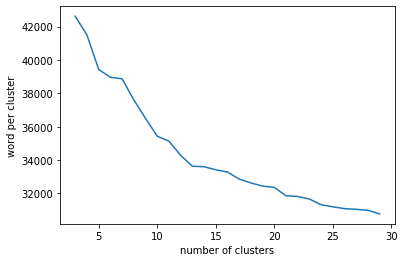

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(3,30),wcss)
plt.xlabel('number of clusters')
plt.ylabel('word per cluster')
plt.show()

In [106]:
true_k=30
Kmeans=KMeans(n_clusters=true_k,init='k-means++',n_init=1)
Kmeans.fit(X)
print("Top terms per cluster:")
order_centroids = Kmeans.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    print("-----------------------")
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()
print("\n")

Top terms per cluster:
Cluster 0:
-----------------------
 mask
 bloody
 thing
 couldn
 windsorblade
 full
 make
 funny
 wasn
 hour

Cluster 1:
-----------------------
 hope
 determine
 podcast
 many
 someone
 enjoy
 something
 possible
 try
 whenever

Cluster 2:
-----------------------
 covid
 footy
 going
 sport
 infinitum
 funny
 full
 proud
 never
 cabinet

Cluster 3:
-----------------------
 sport
 time
 httpstcoqsiqktjhkc
 perspective
 friend
 banter
 glenn
 glike
 mike
 beldner

Cluster 4:
-----------------------
 trask
 kyle
 heisman
 stadium
 race
 like
 last
 trophy
 talk
 star

Cluster 5:
-----------------------
 play
 sport
 like
 funny
 that
 they
 useless
 make
 people
 spot

Cluster 6:
-----------------------
 team
 asked
 saying
 harry
 sport
 short
 httpstcojeubax
 funny
 never
 like

Cluster 7:
-----------------------
 like
 sport
 funny
 it
 people
 think
 know
 much
 look
 shit

Cluster 8:
-----------------------
 sport
 funny
 video
 cards
 check
 america
 tiktok
 